In [1]:
import ctypes
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils

import importlib
import utils

# importlib.reload(utils)

<module 'utils' from '/home/tellocam/Projects/AMP/framework/utils.py'>

In [2]:
binary = ctypes.CDLL( "build/sharedLibrary.so" )
binary.benchLockOMP.restype = utils.benchData
binary.benchCriticalOMP.restype = utils.benchData
binary.benchTAS.restype = utils.benchData
binary.benchTATAS.restype = utils.benchData
binary.benchTicket.restype = utils.benchData
binary.benchArray.restype = utils.benchData
binary.benchCLH.restype = utils.benchData
binary.benchMCS.restype = utils.benchData
binary.benchHemlock.restype = utils.benchData

In [3]:
maxThreads = 12
total_acqs = 1000
bench_iters = 100

threadNum = [i for i in range(2, maxThreads+1)]
bmListLockOMP = {threads: [binary.benchLockOMP(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListCriticalOMP = {threads: [binary.benchCriticalOMP(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListTAS = {threads: [binary.benchTAS(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListTATAS = {threads: [binary.benchTATAS(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListTicket = {threads: [binary.benchTicket(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListArray = {threads: [binary.benchArray(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListCLH = {threads: [binary.benchCLH(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListMCS = {threads: [binary.benchMCS(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListHemlock = {threads: [binary.benchHemlock(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}

df_LockOMP = utils.dataframeBuilder(bmListLockOMP).fillna(0)
df_CriticalOMP = utils.dataframeBuilder(bmListCriticalOMP).fillna(0)
df_TAS = utils.dataframeBuilder(bmListTAS).fillna(0)
df_TATAS = utils.dataframeBuilder(bmListTATAS).fillna(0)
df_Ticket = utils.dataframeBuilder(bmListTicket).fillna(0)
df_array = utils.dataframeBuilder(bmListArray).fillna(0)
df_CLH = utils.dataframeBuilder(bmListCLH).fillna(0)
df_MCS = utils.dataframeBuilder(bmListMCS).fillna(0)
df_Hemlock = utils.dataframeBuilder(bmListHemlock).fillna(0)

MCS Hemlock Summary: 1000 Hemlock acquisiton requests on 2 threads took: 0.000200
  with 20204 failAcq,  1000 successAcq, 1.200000 % fairness dev.,  4992511.234137  acq/s throughput
MCS Hemlock Summary: 1000 Hemlock acquisiton requests on 2 threads took: 0.000166
  with 5836 failAcq,  1001 successAcq, 4.100000 % fairness dev.,  6033755.267581  acq/s throughput
MCS Hemlock Summary: 1000 Hemlock acquisiton requests on 2 threads took: 0.000203
  with 9431 failAcq,  1001 successAcq, 12.300000 % fairness dev.,  4923757.997009  acq/s throughput
MCS Hemlock Summary: 1000 Hemlock acquisiton requests on 2 threads took: 0.000212
  with 11691 failAcq,  1001 successAcq, 5.300000 % fairness dev.,  4728389.232078  acq/s throughput
MCS Hemlock Summary: 1000 Hemlock acquisiton requests on 2 threads took: 0.000152
  with 6527 failAcq,  1000 successAcq, 3.000000 % fairness dev.,  6596306.069426  acq/s throughput
MCS Hemlock Summary: 1000 Hemlock acquisiton requests on 2 threads took: 0.000177
  with 562

In [4]:
print(df_MCS)

    threads  meanTime  stddTime    meanFail      stddFail      meanWait  \
0         2  0.000355  0.000760     6204.63  2.583255e+03  6.480000e-10   
1         3  0.000653  0.001065    35113.45  5.094887e+04  4.938000e-09   
2         4  0.001969  0.002476   117743.91  1.750723e+05  2.301000e-09   
3         5  0.000603  0.000999   113215.09  1.186376e+05  4.844000e-09   
4         6  0.000742  0.001157   146920.26  1.797448e+05  8.625000e-09   
5         7  0.000990  0.001573   179349.47  1.982461e+05  8.616000e-09   
6         8  0.000795  0.001131   244637.21  2.848305e+05  2.082000e-08   
7         9  0.000511  0.000732   290810.25  2.840095e+05  1.778900e-08   
8        10  0.003869  0.007459  1876149.49  5.101368e+06  1.732430e-07   
9        11  0.001271  0.001979   582156.50  1.092796e+06  3.029100e-08   
10       12  0.003652  0.024509  2751032.54  1.839623e+07  6.161300e-08   

        stddWait  meanFair   stddFair        meanTP        stddTP  
0   3.755036e-09     3.533  15.

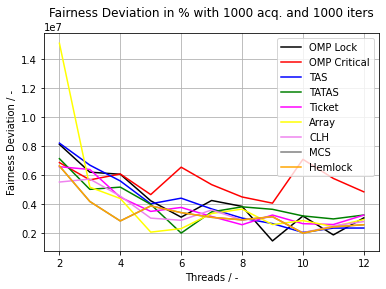

In [6]:
plotWhat = "TP"
LockList = ["OMP Lock", "OMP Critical", "TAS", "TATAS", "Ticket", "Array", "CLH", ]

utils.plotStuff("threads", plotWhat, "OMP Lock", df_LockOMP, "black")
utils.plotStuff("threads", plotWhat, "OMP Critical", df_CriticalOMP, color = "red")
utils.plotStuff("threads", plotWhat, "TAS", df_TAS, "blue")
utils.plotStuff("threads", plotWhat, "TATAS", df_TATAS, "green")
utils.plotStuff("threads", plotWhat, "Ticket", df_Ticket, "magenta")
utils.plotStuff("threads", plotWhat, "Array", df_array, "yellow")
utils.plotStuff("threads", plotWhat, "CLH", df_CLH, "violet")
utils.plotStuff("threads", plotWhat, "MCS", df_MCS, "gray")
utils.plotStuff("threads", plotWhat, "Hemlock", df_MCS, "orange")

plt.title("Fairness Deviation in % with 1000 acq. and 1000 iters")
plt.xlabel("Threads / -")
plt.ylabel("Fairness Deviation / -")
plt.legend()
plt.grid()